In [23]:
# https://www.kaggle.com/datasets/kartik2112/fraud-detection/code

# O atributo de interesse é is_fraud
import pandas as pd

transacoes_train_df = pd.read_csv('datasets/fraudTrain.csv')
transacoes_test_df = pd.read_csv('datasets/fraudTest.csv')

In [24]:
transacoes_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [25]:
# Questao 1
# Caso a regra de decisão da iComida seja de que toda transação é aceita
# e nunca é bloqueada por fraude, qual seria a acurácia deste "modelo"
# nas transações de teste?
# dica: use https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html
# para contar frequências.

transacoes_test_df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [26]:

#acuracia = (1289169) / (1289169 + 7506)
#acuracia

acuracia = (553574) / (553574 + 2145)
acuracia

0.9961401355721147

c:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


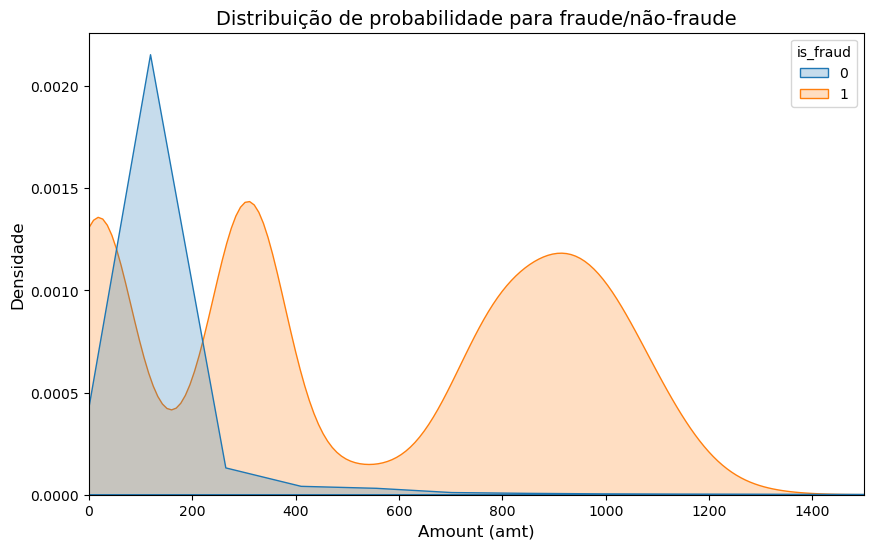

In [41]:
# Questão 3
# Antes de estudar aprendizado de máquina na Faculdade XP,
# sua alternativa para criar modelos preditivos era usar sua intuição, experiência
# e olhar para os dados em busca de padrões.
# Por exemplo, sua experiência lhe diz que transações fraudulentas tendem a
# movimentar valores mais altos, e você confirma isto pelo gráfico abaixo.

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
sns.kdeplot(data=transacoes_train_df, x='amt', hue='is_fraud', fill=True, common_norm=False)

plt.title('Distribuição de probabilidade para fraude/não-fraude', fontsize=14)
plt.xlabel('Amount (amt)', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.xlim(0, 1500)

# Exibindo o gráfico
plt.show()

In [27]:
# Questão 3.
# Então, você tenta criar uma classificador "na mão".
# Você monta classificadores em que, a partir de um certo valor
# valor_minimo_fraude, a transação será classificada como fraude.

import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class ClassificadorDeFraudeManual(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        return self

    def predict(self, X):

       def predict_fraud(x):
            valor_minimo_fraude = 1000
            if x['amt'] > valor_minimo_fraude:
                return 1
            else:
                return 0

       return X.apply(predict_fraud, axis=1)

In [28]:
X = transacoes_train_df[['amt']]
Y = transacoes_train_df['is_fraud']

In [29]:
# Questao 3.
# Você pretende criar uma classificador manual para ajudar o time anti-fraude do iComida.
# A ideia é que, ao invés de ter que examinar dezenas de milhares de potenciais fraudes por dia,
# o time examine apenas um sub-conjunto de potenciais fraudes que seu algoritmo identificou.
# Você experimenta com 4 limiares: 200, 400, 800 e 1.000 reais.
# Qual destes valores de corte gera menos falsos positivos, ou seja, traz mais confiança
# para o time de fraude de que as transações indicadas pelo seu sistema são realmente fraudes?

# Questão 4
# Caso você queira que o seu sistema deixe menos fraudes sem serem escrutinadas pelo time de fraude,
# mesmo que eles tenham que examinar muitas transações legítimas, qual limiar você escolheria?

from sklearn.metrics import classification_report

classificador_manual = ClassificadorDeFraudeManual()
classificador_manual.fit(X, Y)

Y_pred = classificador_manual.predict(X)

report = classification_report(Y, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1289169
           1       0.24      0.13      0.17      7506

    accuracy                           0.99   1296675
   macro avg       0.62      0.56      0.58   1296675
weighted avg       0.99      0.99      0.99   1296675



In [30]:
# Questão 5.
# A partir dos seus estudos em aprendizado de máquina, você
# decide usar os dados para criar o programa que decide se uma transação é fraude,
# ao invés de contar apenas com sua intuição e capacidade de analisar gráficos.
# Você pediu pro chatGPT gerar uma árvode de decisão que classifica fraudes
# a partir do montante (amt) da transação, e ele gerou o seguinte código.
# Incrivelmente, a precisão é 98%! De cada 100 transações que o modelo acusa
# como fraude, ele se equivoca em apenas 2 casos, em média.

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X, Y)

Y_pred = decision_tree_model.predict(X)

report = classification_report(Y, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       0.98      0.56      0.71      7506

    accuracy                           1.00   1296675
   macro avg       0.99      0.78      0.85   1296675
weighted avg       1.00      1.00      1.00   1296675



In [31]:
# Questão 5. Animado com a capacidade de modelos de aprendizado de máquina, você
# quer entender mais sobre o modelo aprendido.
# Visite https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.get_depth
# e responde qual é a profundidade da árvore aprendida.

decision_tree_model.get_depth()

90

In [32]:
# questao 6
# Você acha a profundidade da árvore muito alta, afinal, você está criando a árvore com apenas um atributo (amt)!
# Você usa https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.get_n_leaves para descobrir quantas “folhas” tem a árvore.
# Um nó “folha”, em uma árvore, são os nós finais que efetivamente classificam uma transação entre fraude e legítima.
# Qual o número de folhas da árvore que você criou?

decision_tree_model.get_n_leaves()

9122

In [33]:
# questao 7
# Você decide, agora, computar a precisão e cobertura do modelo no conjunto de treino e de teste.
# O que você observa?

X_train = transacoes_train_df[['amt']]
y_train = transacoes_train_df['is_fraud']

X_test = transacoes_test_df[['amt']]
y_test = transacoes_test_df['is_fraud']

In [34]:
y_pred_test = decision_tree_model.predict(X_test)

report = classification_report(y_test, y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.33      0.26      0.29      2145

    accuracy                           1.00    555719
   macro avg       0.66      0.63      0.64    555719
weighted avg       0.99      1.00      0.99    555719



In [35]:
# Questao 9
# Você percebe que precisa realizar validação cruzada para avaliar o modelo de forma justa.
# O modelo que maximiza a cobertura tem qual profundidade?

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Definir os parâmetros para o GridSearch
param_grid = {
    # complete aqui
    'max_depth': [1, 2, 3, 4, 5, 6, 10, 90],
}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=3, scoring='recall')

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_pred_test = best_model.predict(X_test)

report_test = classification_report(y_test, y_pred_test)
print(report_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.45      0.37      0.41      2145

    accuracy                           1.00    555719
   macro avg       0.73      0.68      0.70    555719
weighted avg       1.00      1.00      1.00    555719



In [36]:
# Questao 9
# Imprimir profundidade máxima e número de nós
print(f"Profundidade máxima da árvore: {best_model.tree_.max_depth}")
print(f"Número de nós na árvore: {best_model.tree_.node_count}")

Profundidade máxima da árvore: 3
Número de nós na árvore: 15


In [37]:
# Questao 9
grid_search.cv_results_

{'mean_fit_time': array([0.24164518, 0.44807569, 0.66752052, 0.82288019, 0.98609583,
        1.01636505, 1.56957889, 1.95908062]),
 'std_fit_time': array([0.02149101, 0.05568883, 0.02317003, 0.04844183, 0.11356446,
        0.0158746 , 0.01313077, 0.00556998]),
 'mean_score_time': array([0.16756701, 0.16555015, 0.15242235, 0.15726415, 0.14155825,
        0.12250892, 0.12885253, 0.15583555]),
 'std_score_time': array([0.00917071, 0.01065389, 0.00230492, 0.00727101, 0.01839244,
        0.00311598, 0.00141826, 0.00313622]),
 'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6, 10, 90],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 10},
  {'max_depth': 90}],
 'split0_test_score': array([0.        , 0.        , 0.39768185, 0.30135891, 0.26378897,
        0.2645883

In [38]:
# Questao 10 / 11
# Agora você quer melhorar o modelo adicionando um novo atributo: a hora do dia em que a transação aconteceu.
# ALTERE o código que você já tem neste notebook para adicionar a variável 'Hour' ao modelo.
# O que aconteceu?

transacoes_train_df['trans_date_trans_time'] = pd.to_datetime(transacoes_train_df['trans_date_trans_time'])
transacoes_train_df['Hour'] = transacoes_train_df['trans_date_trans_time'].dt.hour

transacoes_test_df['trans_date_trans_time'] = pd.to_datetime(transacoes_test_df['trans_date_trans_time'])
transacoes_test_df['Hour'] = transacoes_test_df['trans_date_trans_time'].dt.hour

X_train = transacoes_train_df[['amt', 'Hour']]
y_train = transacoes_train_df['is_fraud']

X_test = transacoes_test_df[['amt', 'Hour']]
y_test = transacoes_test_df['is_fraud']

In [39]:
# Questao 10 / 11
# Agora você quer melhorar o modelo adicionando um novo atributo: a hora do dia em que a transação aconteceu.
# ALTERE o código que você já tem neste notebook para adicionar a variável 'Hour' ao modelo.
# O que aconteceu?

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Definir os parâmetros para o GridSearch
param_grid = {
    # complete aqui
    'max_depth': [1, 2, 3, 4, 5, 6, 10, 90],
}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=3, scoring='precision')

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_pred_test = best_model.predict(X_test)

report_test = classification_report(y_test, y_pred_test)
print(report_test)

c:\Users\jorge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jorge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jorge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.80      0.30      0.44      2145

    accuracy                           1.00    555719
   macro avg       0.90      0.65      0.72    555719
weighted avg       1.00      1.00      1.00    555719



In [40]:
# Questao 12
#Troque a chamada de GridSearchCV para otimizar a cobertura (recall), ao invés de otimizar a precisão (recall).
#Quais os novos valores de precisão e cobertura?

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Definir os parâmetros para o GridSearch
param_grid = {
    # complete aqui
    'max_depth': [1, 2, 3, 4, 5, 6, 10, 90],
}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=3, scoring='recall')

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_pred_test = best_model.predict(X_test)

report_test = classification_report(y_test, y_pred_test)
print(report_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.58      0.51      0.54      2145

    accuracy                           1.00    555719
   macro avg       0.79      0.76      0.77    555719
weighted avg       1.00      1.00      1.00    555719

